# Transfer Learning CIFAR10

* Train a simple convnet on the CIFAR dataset the first 5 output classes [0..4].
* Freeze convolutional layers and fine-tune dense layers for the last 5 ouput classes [5..9].


In [1]:
% tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Import CIFAR10 data and create 2 datasets with one dataset having classes from 0 to 4 and other having classes from 5 to 9 

In [3]:
#Load CIFAR10 dataset available within tensorflow
(train_x, train_y),(test_x,test_y) = tf.keras.datasets.cifar10.load_data()
 # to normalize the data
train_x = train_x/255 
test_x = test_x/255

170500096/170498071 [==============================] - 11s 0us/step


In [4]:
print ('Shape of train_x :', train_x.shape)
print ('Shape of test_x :', test_x.shape)
print ('Shape of train_x :', train_y.shape)
print ('Shape of test_x :', test_y.shape)


Shape of train_x : (50000, 32, 32, 3)
Shape of test_x : (10000, 32, 32, 3)
Shape of train_x : (50000, 1)
Shape of test_x : (10000, 1)


In [5]:
y_0_4 = np.where(train_y <= 4) # taking all indices from training target colum which are less then 4
x_0_4 = train_x[y_0_4[0]] # just storing those indeices  those are  slected in target column
x_0_4.shape # checking shape just to comfirm 


(25000, 32, 32, 3)

In [6]:
y_5_9 = np.where(train_y >= 5) # taking all indices from  training target colum which are more then 4
x_5_9 = train_x[y_5_9[0]] # just storing those indeices those are  slected in target column
x_5_9.shape  # checking shape just to comfirm 


(25000, 32, 32, 3)

In [7]:
test_y_0_4 = np.where(test_y <= 4)# taking all indices from  test set target colum which are less then 4
test_x_0_4 = test_x[test_y_0_4[0]] # just storing those indeices  those are  slected in target column
test_x_0_4.shape # checking shape just to comfirm

(5000, 32, 32, 3)

In [8]:
test_y_5_9 = np.where(test_y >= 5)# taking all indices from  test set target colum which are more then 4
test_x_5_9 = test_x[test_y_5_9[0]] # just storing those indeices  those are  slected in target column
test_x_5_9.shape #checking shape just to comfirm

(5000, 32, 32, 3)

In [9]:
train_0_4_y = train_y[y_0_4]
test_0_4_y = test_y[test_y_0_4]
test_0_4_y.shape

(5000,)

In [10]:
train_5_9_y = train_y[y_5_9]
test_5_9_y = test_y[test_y_5_9]
test_5_9_y.shape

(5000,)

### 2. Use One-hot encoding to divide y_train and y_test into required no of output classes

In [0]:
#Convert labels to one hot encoding
y_0_4_ = tf.keras.utils.to_categorical(train_0_4_y)

In [12]:
test_y_0_4_ = tf.keras.utils.to_categorical(test_0_4_y)
y_0_4_.shape

(25000, 5)

In [0]:
#Convert labels to one hot encoding
y_5_9_ = tf.keras.utils.to_categorical(train_5_9_y,num_classes=10)

In [14]:
test_y_5_9_ = tf.keras.utils.to_categorical(test_5_9_y,num_classes =10)
train_5_9_y.max()

9

In [15]:
y_5_9_ = y_5_9_[:,4:9]
y_5_9_.shape

(25000, 5)

In [16]:
test_y_5_9_ = test_y_5_9_[:,4:9]
test_y_5_9_.shape

(5000, 5)

### 3. Build a sequential neural network model which can classify the classes 0 to 4 of CIFAR10 dataset with at least 80% accuracy on test data

In [0]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout,Activation
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.metrics import Accuracy

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

In [0]:
# Sequential
model = Sequential()

# 1st CNN layer
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_0_4.shape[1:]))
model.add(Activation('relu'))

# 2nd CNN layer 
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# Max pool layer 
model.add(MaxPooling2D(pool_size=(2, 2)))
# Batcth normalizing
model.add(BatchNormalization())

# third CNN layer 
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

# 4th CNN layer 
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# max pool  2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # Dropout = 25%

# Flattening the layer 
model.add(Flatten())

# Dens layer 
model.add(Dense(512,activation ='relu'))
# Drop out 
model.add(Dropout(0.5))

# Output layer 
model.add(Dense(5,activation='softmax'))


In [0]:
#Specify Loass and Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)       

### 4. In the model which was built above (for classification of classes 0-4 in CIFAR10), make only the dense layers to be trainable and conv layers to be non-trainable

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
mckpt = tf.keras.callbacks.ModelCheckpoint('./cifar.h5', 
                                           monitor='val_acc', save_best_only=True,)

In [58]:
history = model.fit(x_0_4,y_0_4_,          
          validation_data=(test_x_0_4,test_y_0_4_),
          epochs=30,
          batch_size=32, callbacks=[mckpt],workers=4)

Train on 25000 samples, validate on 5000 samples
Epoch 1/30
25000/25000 [==============================] - 5s 182us/sample - loss: 0.9714 - accuracy: 0.6050 - val_loss: 0.8863 - val_accuracy: 0.6504
Epoch 2/30
25000/25000 [==============================] - 4s 159us/sample - loss: 0.7450 - accuracy: 0.7134 - val_loss: 0.8682 - val_accuracy: 0.6504
Epoch 3/30
25000/25000 [==============================] - 4s 163us/sample - loss: 0.6331 - accuracy: 0.7619 - val_loss: 0.6613 - val_accuracy: 0.7556
Epoch 4/30
25000/25000 [==============================] - 4s 168us/sample - loss: 0.5671 - accuracy: 0.7904 - val_loss: 0.5802 - val_accuracy: 0.7904
Epoch 5/30
25000/25000 [==============================] - 4s 173us/sample - loss: 0.5041 - accuracy: 0.8122 - val_loss: 0.5624 - val_accuracy: 0.7896
Epoch 6/30
25000/25000 [==============================] - 4s 163us/sample - loss: 0.4503 - accuracy: 0.8356 - val_loss: 0.6094 - val_accuracy: 0.7902
Epoch 7/30
25000/25000 [===========================

In [0]:
model.save_weights('weight.hdf5') # to save weights of our model 

In [0]:
model.save('model.hdf5') # to save our model 

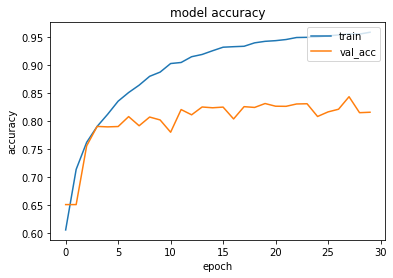

In [66]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val_acc'], loc='upper right')
plt.show()

### 5. Utilize the the model trained on CIFAR 10 (classes 0 to 4) to classify the classes 5 to 9 of CIFAR 10  (Use Transfer Learning) <br>
Achieve an accuracy of more than 85% on test data

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [0]:
model_5_9 =  load_model('model.hdf5')

In [69]:
len(model_5_9.layers)

16

In [70]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model_5_9.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model_5_9.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

conv2d_4
False
activation_4
False
conv2d_5
False
activation_5
False
max_pooling2d_2
False
batch_normalization_1
False
conv2d_6
False
activation_6
False
conv2d_7
False
activation_7
False
max_pooling2d_3
False
dropout_1
False
flatten_1
False
dense_2
True
dropout_2
False
dense_3
True


In [71]:
model_5_9.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_5_9.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 15, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)       

In [0]:
mckpt_5_9 = tf.keras.callbacks.ModelCheckpoint('./cifar_5_9.h5', 
                                           monitor='val_acc', save_best_only=True,)

In [73]:
model_5_9.fit(x_5_9,y_5_9_,          
          validation_data=(test_x_5_9,test_y_5_9_),
          epochs=5,
          batch_size=32, callbacks=[mckpt_5_9],workers=4)

Train on 25000 samples, validate on 5000 samples
Epoch 1/5
25000/25000 [==============================] - 4s 147us/sample - loss: 4.2763 - accuracy: 0.4507 - val_loss: 3.7600 - val_accuracy: 0.5700
Epoch 2/5
25000/25000 [==============================] - 3s 125us/sample - loss: 28.4340 - accuracy: 0.4514 - val_loss: 9.6981 - val_accuracy: 0.6196
Epoch 3/5
25000/25000 [==============================] - 3s 124us/sample - loss: 72.1314 - accuracy: 0.4199 - val_loss: 30.2423 - val_accuracy: 0.5358
Epoch 4/5
25000/25000 [==============================] - 3s 126us/sample - loss: 113.4731 - accuracy: 0.3813 - val_loss: 39.5003 - val_accuracy: 0.4336
Epoch 5/5
25000/25000 [==============================] - 3s 124us/sample - loss: 119.2369 - accuracy: 0.3645 - val_loss: 48.2864 - val_accuracy: 0.5012


In [35]:
model_5_9.fit(x_5_9,y_5_9_,          
          validation_data=(test_x_5_9,test_y_5_9_),
          epochs=30,
          batch_size=32, callbacks=[mckpt_5_9],workers=4)

Train on 25000 samples, validate on 5000 samples
Epoch 1/30
25000/25000 [==============================] - 3s 122us/sample - loss: 25.6091 - accuracy: 0.5560 - val_loss: 36.3271 - val_accuracy: 0.4584
Epoch 2/30
25000/25000 [==============================] - 3s 122us/sample - loss: 28.7985 - accuracy: 0.5546 - val_loss: 26.3353 - val_accuracy: 0.5244
Epoch 3/30
25000/25000 [==============================] - 3s 121us/sample - loss: 29.9692 - accuracy: 0.5602 - val_loss: 44.7699 - val_accuracy: 0.5596
Epoch 4/30
25000/25000 [==============================] - 3s 121us/sample - loss: 31.1924 - accuracy: 0.5640 - val_loss: 13.4298 - val_accuracy: 0.6284
Epoch 5/30
25000/25000 [==============================] - 3s 124us/sample - loss: 39.8008 - accuracy: 0.5474 - val_loss: 76.1102 - val_accuracy: 0.3938
Epoch 6/30
25000/25000 [==============================] - 3s 121us/sample - loss: 45.3313 - accuracy: 0.5379 - val_loss: 182.2656 - val_accuracy: 0.3732
Epoch 7/30
25000/25000 [==============

# Text classification using TF-IDF

### 6. Load the dataset from sklearn.datasets

In [0]:
from sklearn.datasets import fetch_20newsgroups

In [0]:
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

### 7. Training data

In [38]:
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

### 8. Test data

In [0]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

###  a.  You can access the values for the target variable using .target attribute 
###  b. You can access the name of the class in the target variable with .target_names


In [40]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2])

In [41]:
twenty_train.target_names

['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

In [42]:
twenty_train.data[0:5]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

### 9.  Now with dependent and independent data available for both train and test datasets, using TfidfVectorizer fit and transform the training data and test data and get the tfidf features for both

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [0]:
#from sklearn.model_selection import train_test_split
# split into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [0]:
y_trn = twenty_train.target
y_tst = twenty_test.target

In [46]:
vect = TfidfVectorizer()
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english')
dtm_train = vect.fit_transform(twenty_train.data)
dtm_test = vect.transform(twenty_test.data)
features = vect.get_feature_names()
print (dtm_train.shape)
print (dtm_test.shape)

(2257, 35482)
(1502, 35482)


### 10. Use logisticRegression with tfidf features as input and targets as output and train the model and report the train and test accuracy score

In [47]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)
logreg.fit(dtm_train, y_trn)
y_pred_class = logreg.predict(dtm_test)
print('test Accuracy ',metrics.accuracy_score(y_tst, y_pred_class))
y_pred_class_train = logreg.predict(dtm_train)
print('train accuracy ',metrics.accuracy_score(y_trn, y_pred_class_train))


test Accuracy  0.9174434087882823
train accuracy  1.0


In [48]:
# Classification report  
print(metrics.classification_report(y_tst, y_pred_class))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       319
           1       0.95      0.94      0.95       389
           2       0.93      0.93      0.93       396
           3       0.90      0.94      0.92       398

    accuracy                           0.92      1502
   macro avg       0.92      0.91      0.91      1502
weighted avg       0.92      0.92      0.92      1502

